# 构造平衡kd树
输入：k维空间数据集T={x1,x2,...,xn}
其中xi=(xi(1),xi(2),....,xi(k)),i=1,2,...,N
输出：kd树
（1）开始：构造根结点，根结点对应于包含T的k维空间的超矩形区域。
（2）重复：对深度为j的结点，选择x(l)为切分的坐标轴，l=j(mod k)+1，以该
结点的区域中所有实例的x(l)坐标的中位数为切分点，将该结点对应的超矩形区域
切分为两个子区域
（3）直到两个子区域没有实例存在时停止，从而形成kd树的区域划分

# 用kd树的最近邻搜索
输入：已构造的kd树；目标点x；
输出：x的最近邻
（1）在kd树中找出包含目标点x的叶结点：从根结点出发，递归地向下访问kd树
若目标点x当前维的坐标小于切分点的坐标，则移动到左子结点，否则移动到右
子结点。直到子结点为叶结点为止。
（2）以此叶结点为“当前最近点”
（3）递归地向上回退，在每个结点进行以下操作：
（a）如果该结点保存的实例点比当前最近点距离目标点更近，则以该实例点为
“当前最近点”。
（b）当前最近点一定存在于该结点一个子结点对应的区域。检查该子结点的父结点的另一
子结点对应的区域是否有更近的点。具体地，检查另一子结点对应的区域是否以目标点位球
心、以目标点与“当前最近点”间的距离为半径的超球体相交。
        如果相交，可能在另一个子结点对应的区域内存在距目标点更近的点，移动到另一个
子结点，接着，递归地进行搜索。
        如果不相交，向上回退。
（4）当回退到根结点时，搜索结束。最后的“当前最近点”即为x的最近邻点


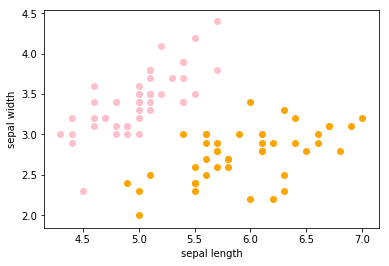

In [12]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
data = np.array(df.iloc[:100, [0, 1, -1]])
train, test = train_test_split(data, test_size=0.1)
x0 = np.array([x0 for i, x0 in enumerate(train) if train[i][-1] == 0])
x1 = np.array([x1 for i, x1 in enumerate(train) if train[i][-1] == 1])
plt.scatter(x0[:, 0], x0[:, 1], c='pink', label='[0]')
plt.scatter(x1[:, 0], x1[:, 1], c='orange', label='[1]')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

X_train=train[:,:-1]
y_train=train[:,-1]
X_test=test[:,:-1]
y_test=test[:,-1]


class Node:
    def __init__(self,data,l,lchild=None,rchild=None,depth=0):
        self.data=data
        self.lchild=lchild
        self.rchild=rchild
        self.depth=depth
        self.l=l



class KDTree:
    def __init__(self):
        self.kdtree=None
        self.minDist=math.inf
        self.nearest=None
    
    def createTree(self,X_train,depth=0):
        if len(X_train)!=0:
            m,k=X_train.shape
            l=depth%k  #应该选择的属性序号
            mid=int(m/2)
            XCopy=X_train[np.argsort(X_train,axis=0)[:,l]]
            node=Node(XCopy[mid],l,depth=depth)
            if depth==0:
                self.kdtree=node
            node.lchild=self.createTree(XCopy[:mid],depth=depth+1)
            node.rchild=self.createTree(XCopy[(mid+1):],depth=depth+1)
            return node
        return None
    
    def search(self,x):
        self.recurve(x,self.kdtree)
                        
    def preOrder(self,node):
        if node is not None:
            print("depth: ",node.depth)
            print("data: ",node.data)
            self.preOrder(node.lchild)
            self.preOrder(node.rchild)
            
    def recurve(self,x,node):   
        if node is not None:
            if x[node.l]-node.data[node.l]<0:
                self.recurve(x,node.lchild)
            else:
                self.recurve(x,node.rchild)
                
            dist=np.sqrt(np.sum((x-node.data)**2))
            if dist<self.minDist:
                self.minDist=dist
                self.nearest=node
                
                
    
    
        

In [13]:
clf=KDTree()
clf.createTree(X_train)

clf.preOrder(clf.kdtree)

depth:  0
data:  [5.4 3.9]
depth:  1
data:  [5.1 3.3]
depth:  2
data:  [4.9 2.4]
depth:  3
data:  [4.6 3.1]
depth:  4
data:  [4.4 3. ]
depth:  5
data:  [4.3 3. ]
depth:  6
data:  [4.4 2.9]
depth:  5
data:  [4.8 3. ]
depth:  6
data:  [4.5 2.3]
depth:  4
data:  [4.7 3.2]
depth:  5
data:  [4.6 3.2]
depth:  6
data:  [4.4 3.2]
depth:  5
data:  [4.7 3.2]
depth:  6
data:  [4.8 3.1]
depth:  3
data:  [5.4 3. ]
depth:  4
data:  [5.  2.3]
depth:  5
data:  [4.9 3. ]
depth:  6
data:  [5. 2.]
depth:  5
data:  [5. 3.]
depth:  6
data:  [5.1 2.5]
depth:  4
data:  [4.9 3.1]
depth:  5
data:  [4.9 3.1]
depth:  6
data:  [4.9 3.1]
depth:  5
data:  [5.  3.2]
depth:  2
data:  [5.1 3.5]
depth:  3
data:  [5.  3.4]
depth:  4
data:  [4.8 3.4]
depth:  5
data:  [4.8 3.4]
depth:  6
data:  [4.6 3.4]
depth:  5
data:  [5.  3.4]
depth:  6
data:  [5.  3.3]
depth:  4
data:  [5.  3.5]
depth:  5
data:  [4.6 3.6]
depth:  6
data:  [5.  3.5]
depth:  5
data:  [5.  3.6]
depth:  6
data:  [5.1 3.5]
depth:  3
data:  [5.1 3.8]
depth